In [26]:
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings('ignore')
%matplotlib inline

In [27]:
data = open('log_tpbench.txt', 'r').readlines()

In [28]:
import pandas as pd
columns = data[0].split()
df = pd.DataFrame(columns=columns)
for line in data[1:]:
    df = df.append(pd.Series(line.split(), index=columns), ignore_index=True)

In [29]:
# Change time from unix timestamp to datetime
df['time'] = pd.to_datetime(df['time'], unit='s')

# Round time to nearest 10 milliseconds
df['time'] = df['time'].dt.round('1ms')

# Round all the numeric columns to 2 decimal places
for col in df.columns[1:]:
    df[col] = df[col].astype(float).round(2)

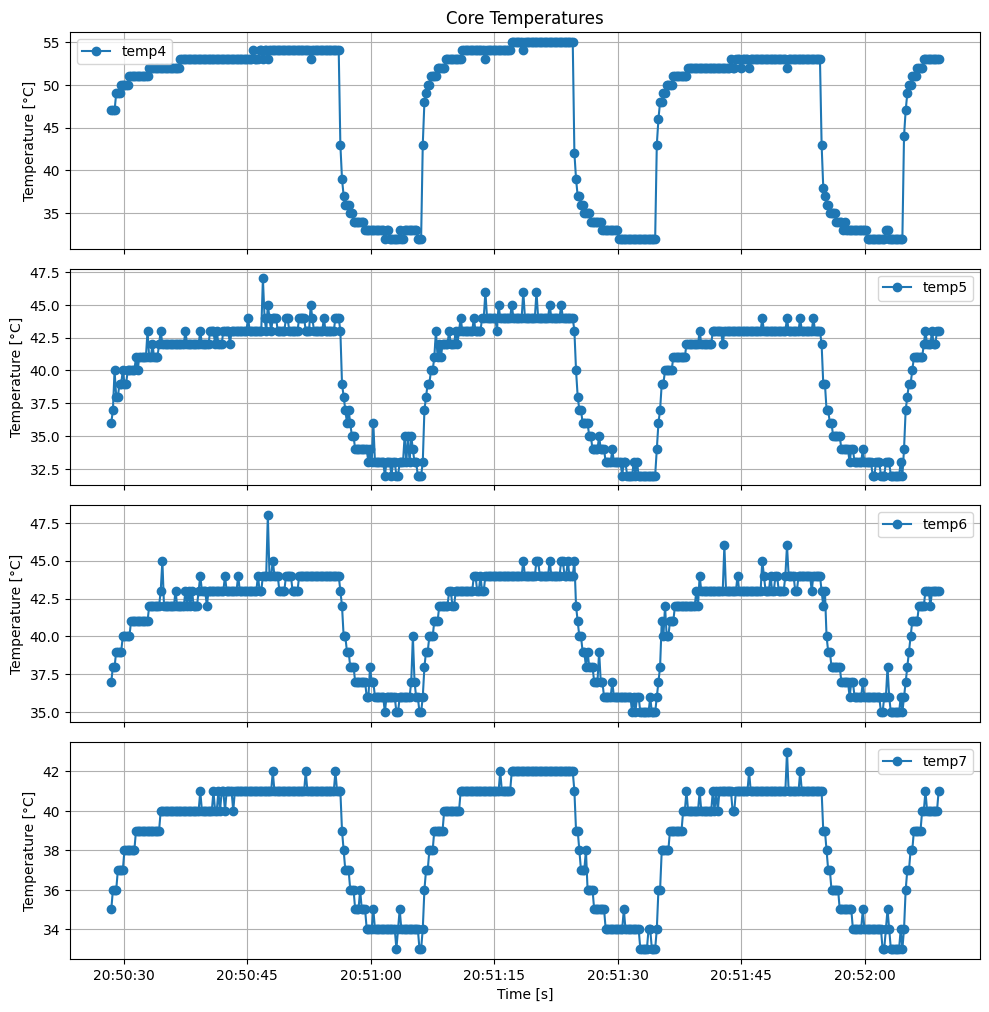

In [30]:
# Make a plot with subplots for each temperature
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10, 10))

for i, temp in enumerate(['temp4', 'temp5', 'temp6', 'temp7']):
    axes[i].plot(df['time'], df[temp], 'o-', label=temp)
    axes[i].set_ylabel('Temperature [°C]')
    axes[i].legend()
    axes[i].grid()

axes[3].set_xlabel('Time [s]')
fig.tight_layout()
axes[0].set_title('Core Temperatures')
fig.savefig('Plots/core_temperatures_tpbench.png')

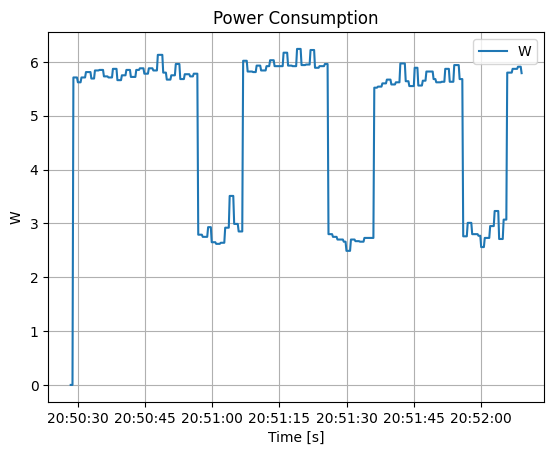

In [31]:
plt.plot(df['time'], df['W'], label='W')
plt.xlabel('Time [s]')
plt.ylabel('W')
plt.title('Power Consumption')
plt.savefig('Plots/power_consumption_tpbench.png')
plt.legend()
plt.grid()
plt.show()

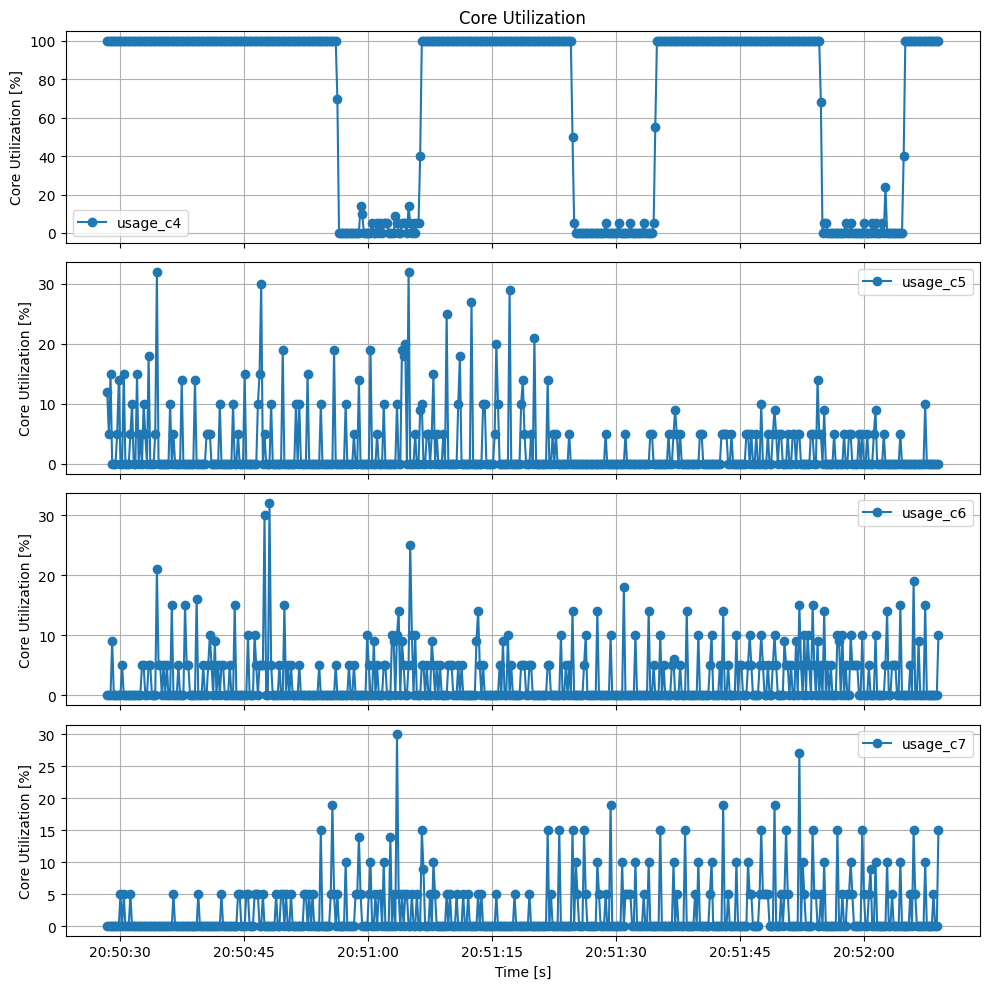

In [32]:
fig, axes = plt.subplots(nrows=4, ncols=1, sharex=True, figsize=(10, 10))

for i, usage in enumerate(['usage_c4', 'usage_c5', 'usage_c6', 'usage_c7']):
    axes[i].plot(df['time'], df[usage]*100, 'o-', label=usage)
    axes[i].set_ylabel('Core Utilization [%]')
    axes[i].legend()
    axes[i].grid()

axes[3].set_xlabel('Time [s]')
axes[0].set_title('Core Utilization')
fig.tight_layout()
fig.savefig('Plots/core_utilization_tpbench.png')